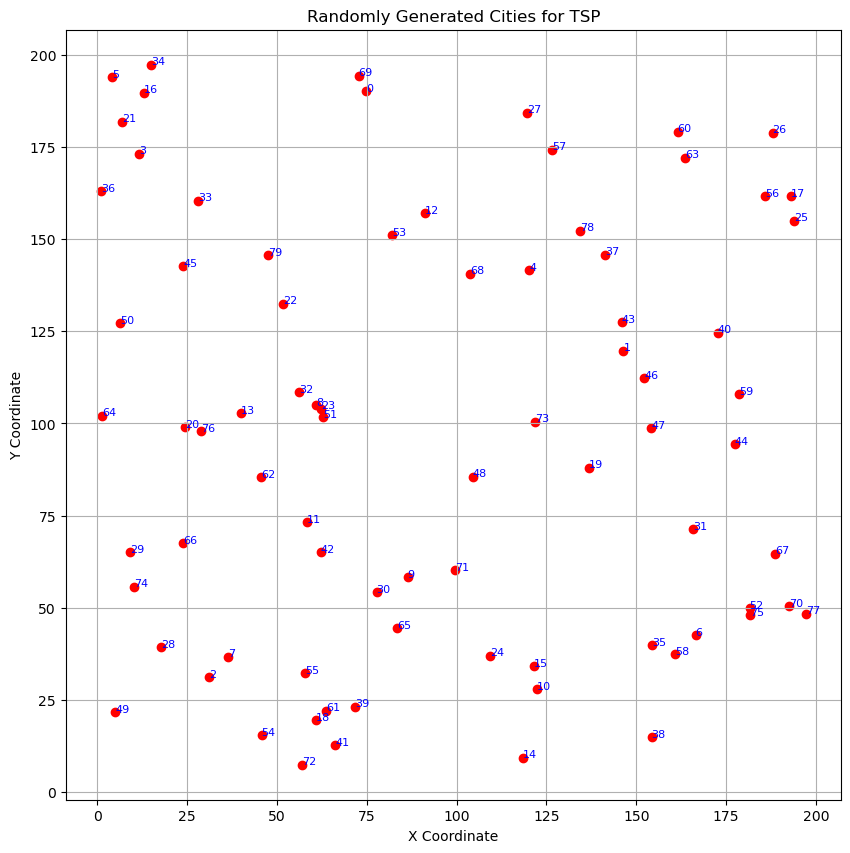

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random cities
n_cities = 80
coordinates = np.random.rand(n_cities, 2) * 200  # Assuming a 200x200 grid

# Plotting the cities
plt.figure(figsize=(10, 10))
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='red', marker='o')
for i, coord in enumerate(coordinates):
    plt.text(coord[0], coord[1], str(i), color="blue", fontsize=8)
plt.title('Randomly Generated Cities for TSP')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


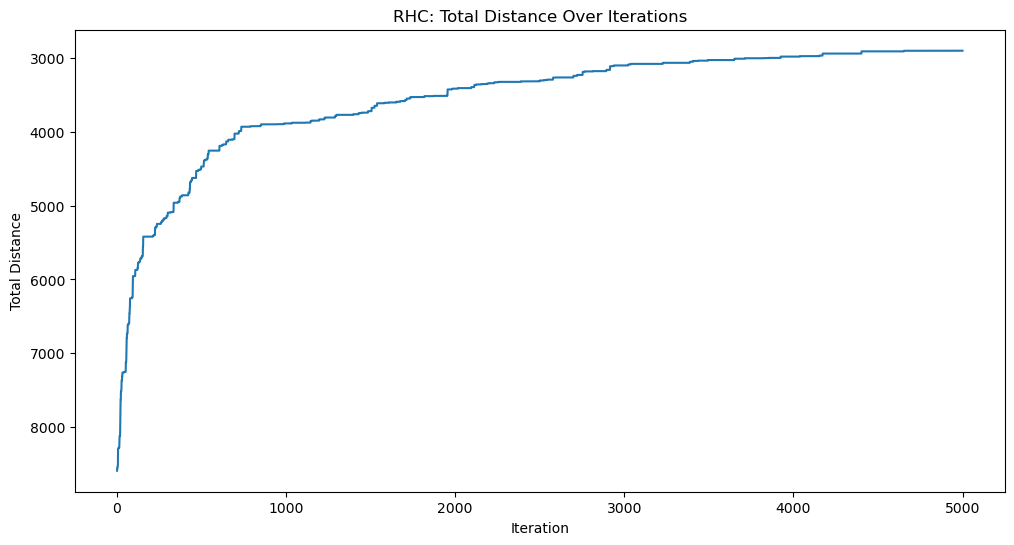

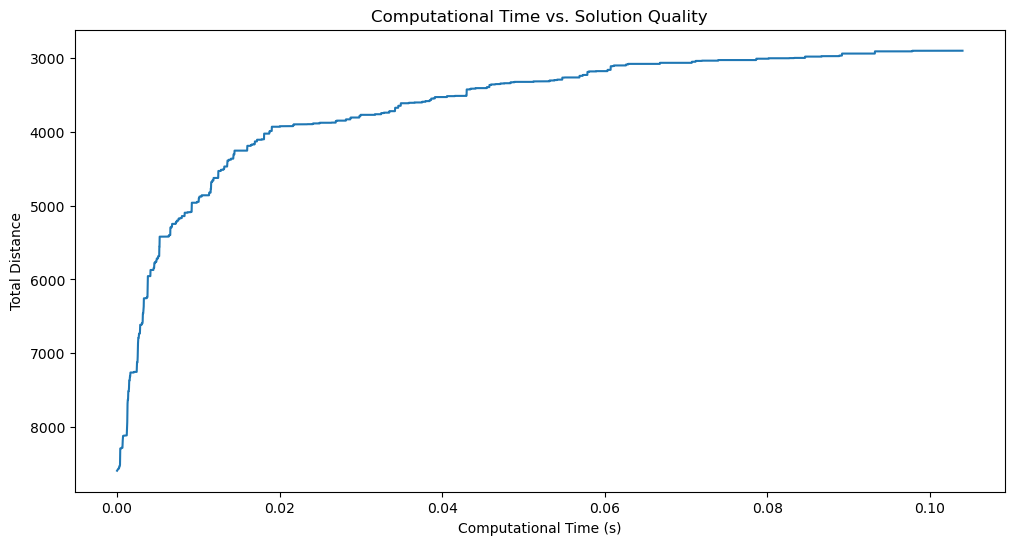

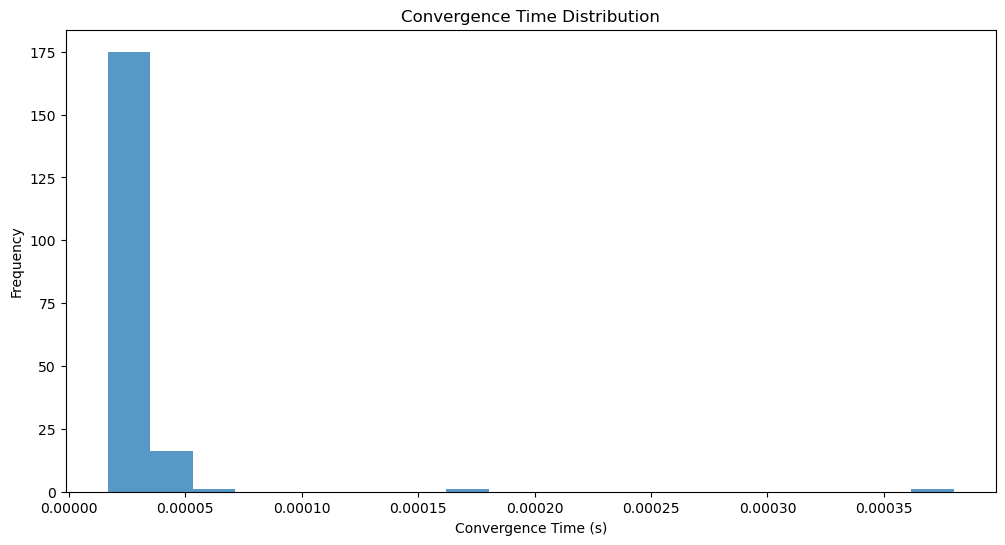

Best Route (RHC): [34  3 36 33 53 17 25  4  9 30 71 24 14 10 15 48 73 78 37 68 12 57 27  0
 79 13 61 18 38 77 70  6 58 35 55 42 23  8 32 11 62 50 21  5 16 45 22 51
 19  1 31 44 59 43 46 47 39 41 54 72 28 64 20 76 66  7  2 49 74 29 65 67
 52 75 40 56 26 60 63 69]
Best Distance (RHC): 2898.5349033316375


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Assuming 'dist_matrix' contains the distance matrix for the cities
def calculate_total_distance(route, dist_matrix):
    return np.sum(dist_matrix[route[:-1], route[1:]]) + dist_matrix[route[-1], route[0]]

def rhc_tsp(dist_matrix, iterations=5000):
    n_cities = dist_matrix.shape[0]
    best_route = np.random.permutation(n_cities)
    best_distance = calculate_total_distance(best_route, dist_matrix)
    fitness_over_time = [best_distance]
    
    time_log = []
    cumulative_time_log = [0]  # To store cumulative time for solution quality plot
    convergence_times = []  # To store times of convergence events

    for iteration in range(iterations):
        start_time = time.perf_counter()

        # Generate a neighbor by swapping two cities
        neighbor = best_route.copy()
        swap_indices = np.random.choice(n_cities, 2, replace=False)
        neighbor[swap_indices] = neighbor[swap_indices[::-1]]

        neighbor_distance = calculate_total_distance(neighbor, dist_matrix)

        # Accept the neighbor if it's better
        if neighbor_distance < best_distance:
            best_route, best_distance = neighbor, neighbor_distance
            convergence_times.append(time.perf_counter() - start_time)  # Record convergence event

        fitness_over_time.append(best_distance)

        end_time = time.perf_counter()
        time_log.append(end_time - start_time)
        cumulative_time_log.append(cumulative_time_log[-1] + (end_time - start_time))

    # Plotting the fitness (distance) over iterations
    plt.figure(figsize=(12, 6))
    plt.plot(fitness_over_time)
    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.title('RHC: Total Distance Over Iterations')
    plt.gca().invert_yaxis()  # Invert y-axis to show the lower distance as "better"
    plt.show()

    # Plot Computational Time vs. Solution Quality
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_time_log, fitness_over_time)
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Total Distance')
    plt.title('Computational Time vs. Solution Quality')
    plt.gca().invert_yaxis()
    plt.show()

    # Plot Convergence Time Distribution
    plt.figure(figsize=(12, 6))
    plt.hist(convergence_times, bins=20, alpha=0.75)
    plt.xlabel('Convergence Time (s)')
    plt.ylabel('Frequency')
    plt.title('Convergence Time Distribution')
    plt.show()

    return best_route, best_distance

# Assuming 'dist_matrix' is already defined (as given in the initial problem)
# Run the RHC algorithm for TSP
best_route_rhc, best_distance_rhc = rhc_tsp(dist_matrix)
print(f"Best Route (RHC): {best_route_rhc}\nBest Distance (RHC): {best_distance_rhc}")


C:\Users\hoode\AppData\Local\Temp\ipykernel_25856\1173719745.py:43: RuntimeWarning: overflow encountered in scalar divide
  if neighbor_distance < current_distance or np.random.rand() < np.exp((current_distance - neighbor_distance) / temp):
C:\Users\hoode\AppData\Local\Temp\ipykernel_25856\1173719745.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  if neighbor_distance < current_distance or np.random.rand() < np.exp((current_distance - neighbor_distance) / temp):


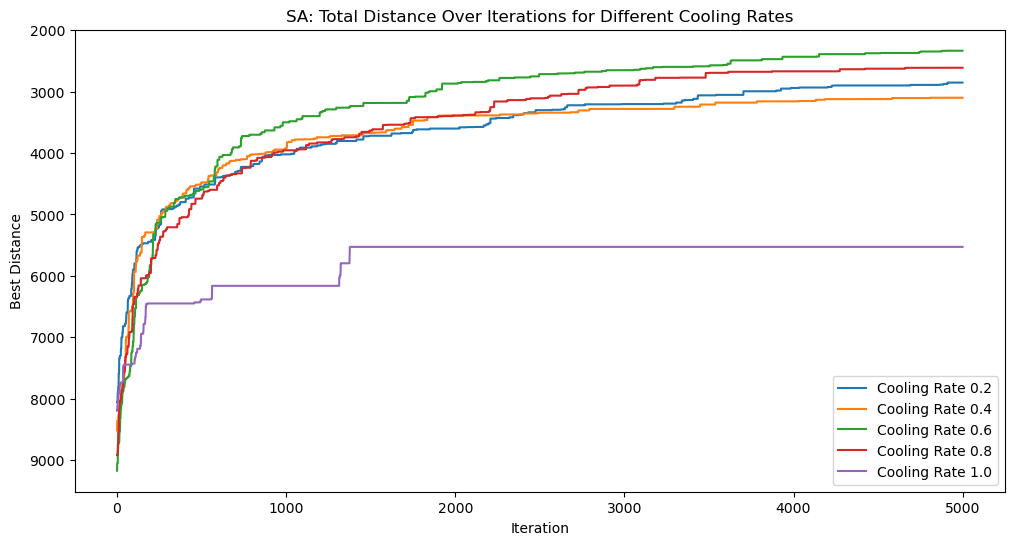

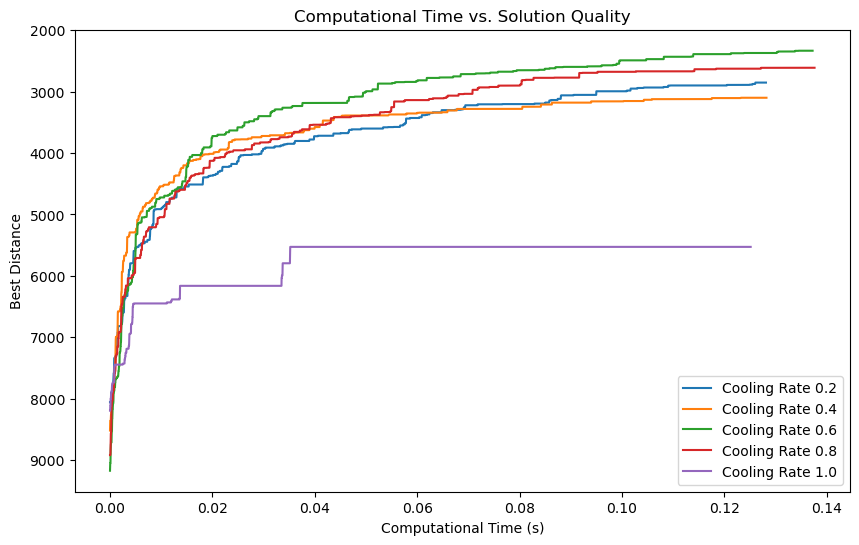

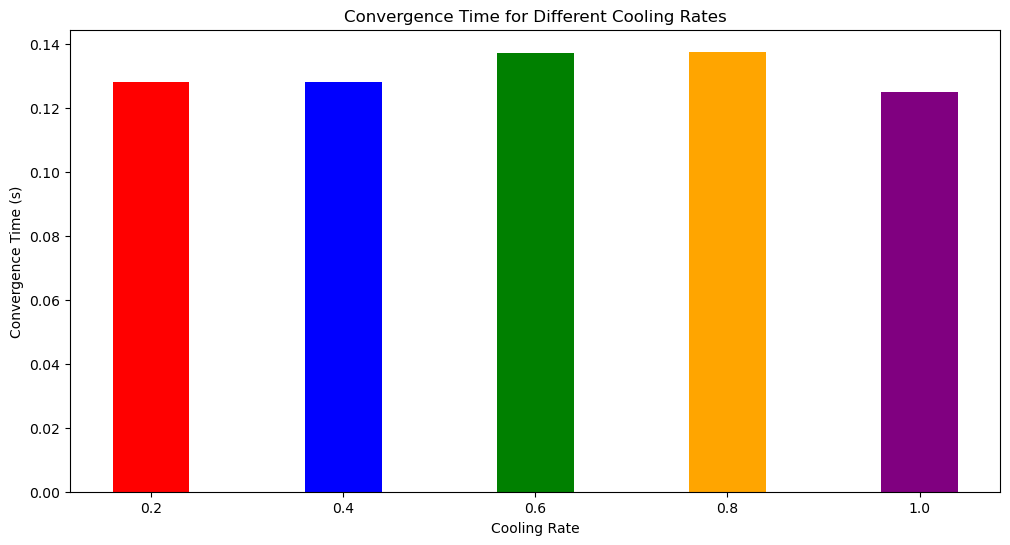

Cooling Rate 0.2: Best Value = 2853.7623577575937, Avg Time = 0.000026 s
Cooling Rate 0.4: Best Value = 3100.825250552391, Avg Time = 0.000026 s
Cooling Rate 0.6: Best Value = 2334.918713354684, Avg Time = 0.000027 s
Cooling Rate 0.8: Best Value = 2612.3684692384704, Avg Time = 0.000028 s
Cooling Rate 1.0: Best Value = 5528.988217430909, Avg Time = 0.000025 s


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time

# Set the random seed for reproducibility and generate the cities
np.random.seed(42)
n_cities = 80
coordinates = np.random.rand(n_cities, 2) * 200  # Assuming a 200x200 grid
dist_matrix = squareform(pdist(coordinates))

def sa_tsp(dist_matrix, iterations=5000, initial_temp=100, cooling_rates=[0.95]):
    n_cities = dist_matrix.shape[0]
    best_values = {}  # Initialize dictionary to store the best value for each cooling rate
    avg_time_log = {}  # Initialize dictionary to store average time for each cooling rate
    
    # Initialize results storage
    distances_over_time = {cr: [] for cr in cooling_rates}
    quality_time_data = {cr: [] for cr in cooling_rates}  # Computational Time vs. Solution Quality
    convergence_data = {cr: [] for cr in cooling_rates}  # Convergence Time Data
    
    for cooling_rate in cooling_rates:
        # Initialize a random tour
        current_route = np.random.permutation(n_cities)
        current_distance = np.sum(dist_matrix[current_route[:-1], current_route[1:]]) + dist_matrix[current_route[-1], current_route[0]]
        
        best_route = current_route.copy()
        best_distance = current_distance
        
        cumulative_time = 0  # Initialize cumulative time
        
        temp = initial_temp
        for iteration in range(iterations):
            start_time = time.perf_counter()
            
            # Generate a neighbor by swapping two cities
            i, j = np.random.choice(n_cities, 2, replace=False)
            neighbor_route = current_route.copy()
            neighbor_route[i], neighbor_route[j] = neighbor_route[j], neighbor_route[i]
            neighbor_distance = np.sum(dist_matrix[neighbor_route[:-1], neighbor_route[1:]]) + dist_matrix[neighbor_route[-1], neighbor_route[0]]
            
            # Decide whether to accept the neighbor
            if neighbor_distance < current_distance or np.random.rand() < np.exp((current_distance - neighbor_distance) / temp):
                current_route, current_distance = neighbor_route, neighbor_distance
                
                # Update the best found solution
                if current_distance < best_distance:
                    best_route, best_distance = current_route, current_distance
            
            distances_over_time[cooling_rate].append(best_distance)
            quality_time_data[cooling_rate].append((cumulative_time, best_distance))
            
            end_time = time.perf_counter()
            cumulative_time += end_time - start_time
            
            temp *= cooling_rate  # Cool down
        
        best_values[cooling_rate] = best_distance
        avg_time_log[cooling_rate] = cumulative_time / iterations  # Average time per iteration
        convergence_data[cooling_rate] = cumulative_time  # Record final convergence time

    # Plotting Fitness Function over Iterations for different cooling rates
    plt.figure(figsize=(12, 6))
    for cr, distances in distances_over_time.items():
        plt.plot(distances, label=f'Cooling Rate {cr}')
    plt.xlabel('Iteration')
    plt.ylabel('Best Distance')
    plt.title('SA: Total Distance Over Iterations for Different Cooling Rates')
    plt.gca().invert_yaxis()  # Lower distances are better
    plt.legend()
    plt.show()

    # Plot Computational Time vs. Solution Quality for all cooling rates
    plt.figure(figsize=(10, 6))
    for cr, data in quality_time_data.items():
        times, qualities = zip(*data)
        plt.plot(times, qualities, label=f'Cooling Rate {cr}')
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Best Distance')
    plt.title('Computational Time vs. Solution Quality')
    plt.gca().invert_yaxis()  # Lower distances are better
    plt.legend()
    plt.show()

    # Plot Convergence Time for all cooling rates
    plt.figure(figsize=(12, 6))
    rates = list(convergence_data.keys())  # Make sure these are unique
    times = [convergence_data[cr] for cr in rates]
    bar_width = 0.4  # You can adjust this width as necessary

    # Create an array with the positions of each bar along the x-axis
    x_positions = np.arange(len(rates))

    plt.bar(x_positions, times, width=bar_width, color=['red', 'blue', 'green', 'orange', 'purple'])

    plt.xlabel('Cooling Rate')
    plt.ylabel('Convergence Time (s)')
    plt.title('Convergence Time for Different Cooling Rates')

    # Replace the x values with the cooling rate labels, centered in the middle of the bars
    plt.xticks(x_positions, rates)

    plt.show()

    return best_values, avg_time_log

# Set cooling rates as specified
cooling_rates = [0.2, 0.4, 0.6, 0.8, 1.0]

# Run the SA algorithm for TSP with different cooling rates
best_values, avg_time_log = sa_tsp(dist_matrix, iterations=5000, initial_temp=100, cooling_rates=cooling_rates)

# Output the results for each cooling rate
for cr in cooling_rates:
    print(f"Cooling Rate {cr}: Best Value = {best_values[cr]}, Avg Time = {avg_time_log[cr]:.6f} s")


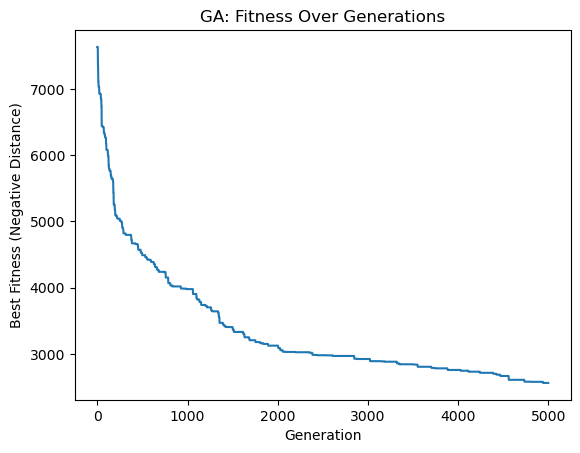

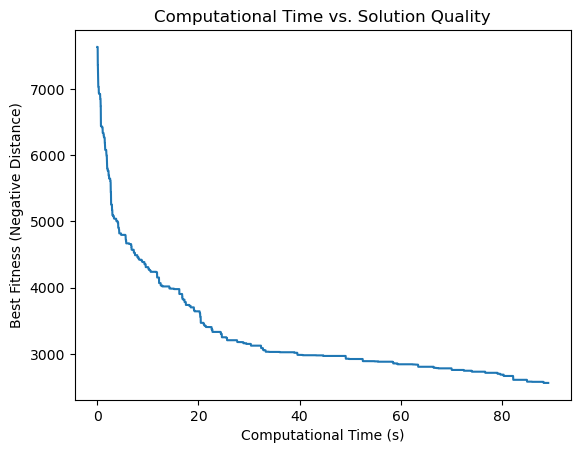

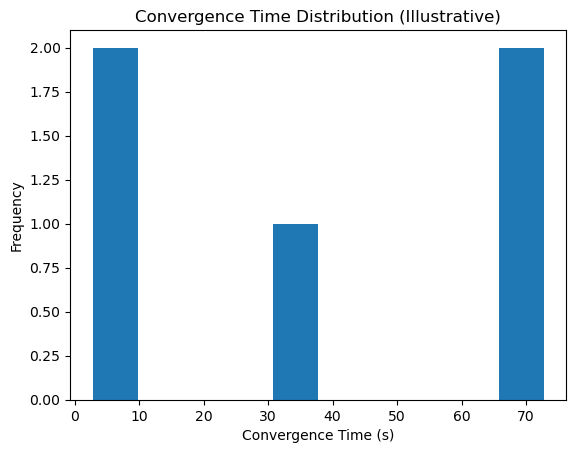

Best route (GA): [ 0 69 26 17 25 37 78 43  1 40 63 60 56 59 44 31 15 24  7  2 61 39 14 35
 77 67 70 73 48 51  8 23 32 66 29 74 28 49 72 41 19 47 46 30 71 65 55 18
 54 64 50 45 33 36  3 21  5 34 16 27 57  4 68  9 42 11 13 22 79 20 76 62
 10 38 58  6 75 52 12 53]
Best distance (GA): 2560.8875893241584


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random cities
n_cities = 80
coordinates = np.random.rand(n_cities, 2) * 200  # Assuming a 200x200 grid

# Calculate the distance matrix
dist_matrix = squareform(pdist(coordinates))

def genetic_algorithm_tsp(dist_matrix, population_size, generations, mutation_rate, crossover_rate):
    n_cities = dist_matrix.shape[0]

    def fitness(route):
        return -np.sum(dist_matrix[route[:-1], route[1:]]) - dist_matrix[route[-1], route[0]]
    
    def create_initial_population():
        return np.array([np.random.permutation(n_cities) for _ in range(population_size)])
    
    def ordered_crossover(parent1, parent2):
        start, end = sorted(np.random.choice(n_cities, 2, replace=False))
        child = -np.ones(n_cities, dtype=int)
        child[start:end+1] = parent1[start:end+1]
        fill_values = [item for item in parent2 if item not in child]
        child[child == -1] = fill_values
        return child
    
    def mutate(route):
        i, j = np.random.choice(n_cities, 2, replace=False)
        route[i], route[j] = route[j], route[i]
        return route
    
    population = create_initial_population()
    fitness_history = []
    cumulative_time = []
    total_time = 0

    for generation in range(generations):
        start_time = time.perf_counter()
        fitness_values = np.array([fitness(individual) for individual in population])
        fitness_history.append(-fitness_values.max())
        
        selection_probs = np.exp(fitness_values - fitness_values.max())  # Softmax selection
        parents_indices = np.random.choice(population_size, size=population_size, replace=True, p=selection_probs/selection_probs.sum())
        parents = population[parents_indices]
        
        children = []
        for i in range(0, population_size, 2):
            if np.random.rand() < crossover_rate:
                children.append(ordered_crossover(parents[i], parents[i+1]))
                children.append(ordered_crossover(parents[i+1], parents[i]))
            else:
                children.append(parents[i].copy())
                children.append(parents[i+1].copy())
        
        for i in range(population_size):
            if np.random.rand() < mutation_rate:
                children[i] = mutate(children[i])
        
        population = np.array(children)
        
        end_time = time.perf_counter()
        total_time += end_time - start_time
        cumulative_time.append(total_time)

    best_fitness_idx = np.argmax(fitness_values)
    best_route = population[best_fitness_idx]
    best_distance = -fitness_values[best_fitness_idx]

    # Plot Fitness over Generations
    plt.plot(fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness (Negative Distance)')
    plt.title('GA: Fitness Over Generations')
    plt.show()
    
    # Plot Computational Time vs. Solution Quality
    plt.plot(cumulative_time, fitness_history)
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Best Fitness (Negative Distance)')
    plt.title('Computational Time vs. Solution Quality')
    plt.show()

    # Convergence Time Distribution (Illustrative; not actual distribution)
    # Note: For a realistic convergence time distribution, multiple runs are required.
    # Here, we plot milestones of fitness improvement for illustration.
    significant_improvements = [i for i in range(1, len(fitness_history)) if fitness_history[i] - fitness_history[i - 1] > 1e-4]
    convergence_times = [cumulative_time[i] for i in significant_improvements]
    plt.hist(convergence_times, bins=10)
    plt.xlabel('Convergence Time (s)')
    plt.ylabel('Frequency')
    plt.title('Convergence Time Distribution (Illustrative)')
    plt.show()
    
    return best_route, best_distance

best_route_ga, best_distance_ga = genetic_algorithm_tsp(
    dist_matrix, population_size=100, generations=5000,
    mutation_rate=0.01, crossover_rate=0.7
)
print(f"Best route (GA): {best_route_ga}\nBest distance (GA): {best_distance_ga}")


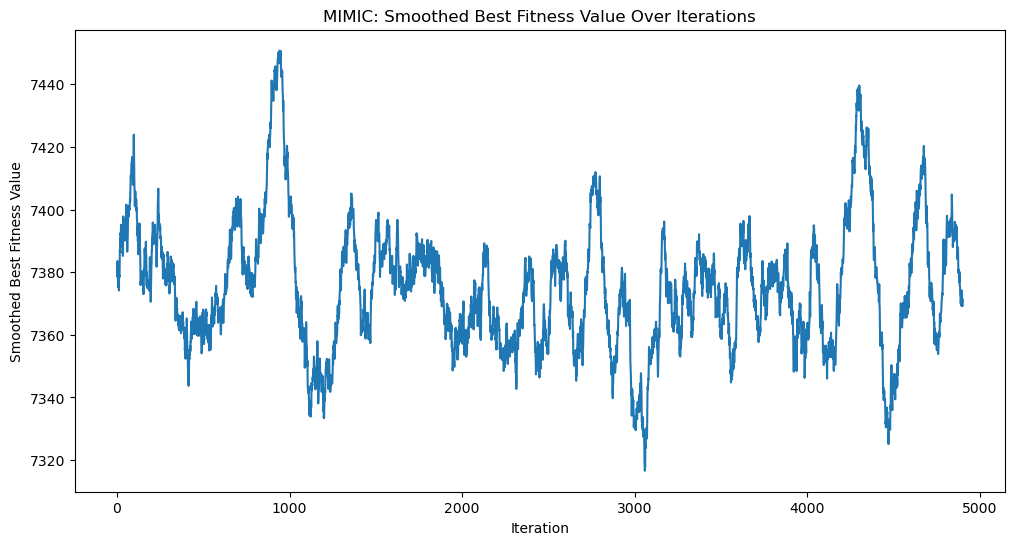

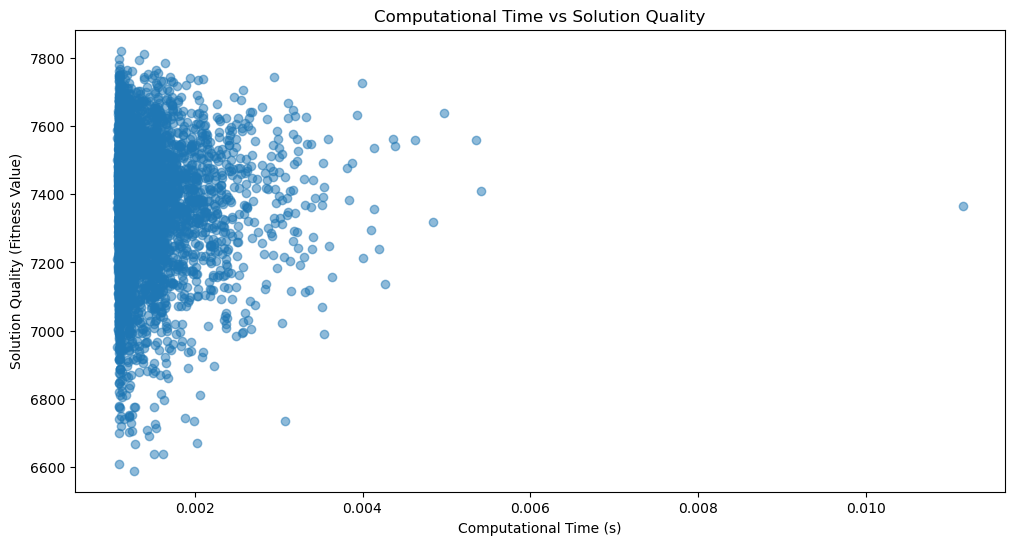

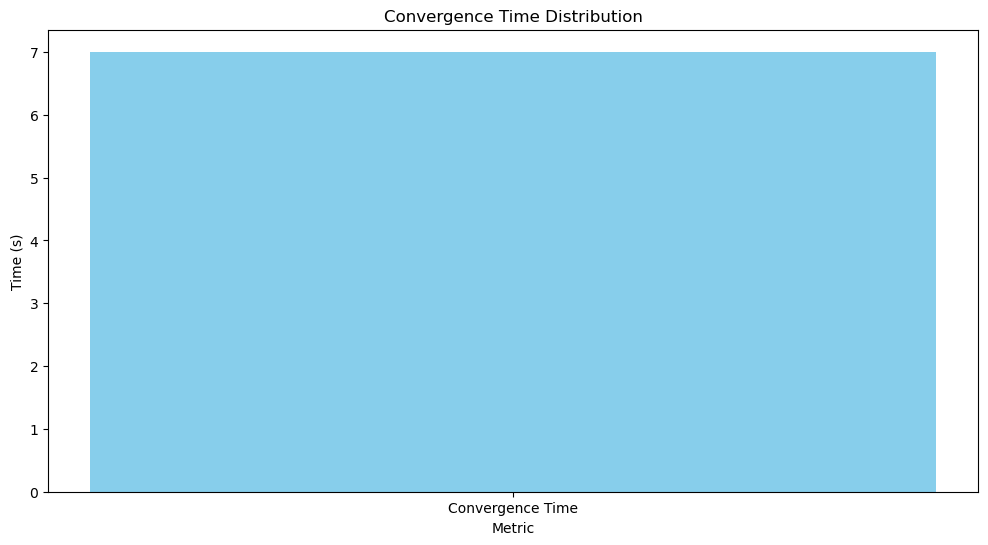

Best route (MIMIC): [20 65 46 63 23  3 42 64 34  6  0 41 37 27  9 25  5 32 18 36 30 66 21 71
 10 29 17 76 72 43 55 28 47  1 58 69 78 45 53 12 59 13 57  8 48 26 60 50
 33 56 19 24 51  4 52 14 38 16 77  7 75 73 49 35 39 54 67 68  2 31 15 11
 70 62 74 40 22 79 61 44]
Best distance (MIMIC): 7439.783206644021


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time

np.random.seed(42)
dist_matrix = squareform(pdist(coordinates))

def mimic_tsp(dist_matrix, population_size, iterations):
    n_cities = dist_matrix.shape[0]

    def fitness(route):
        return -np.sum(dist_matrix[route[:-1], route[1:]]) + dist_matrix[route[-1], route[0]]

    def create_initial_population():
        return np.array([np.random.permutation(n_cities) for _ in range(population_size)])
    
    population = create_initial_population()
    fitness_history = []
    time_quality_data = []

    for iteration in range(iterations):
        start_time = time.perf_counter()

        fitness_values = np.array([fitness(individual) for individual in population])
        sorted_indices = np.argsort(fitness_values)
        population = population[sorted_indices]

        # Select the top 50% of the population
        selected = population[-int(population_size * 0.5):]
        
        # Generate new population based on selected individuals
        new_population = []
        for _ in range(population_size):
            sample = selected[np.random.randint(len(selected))]
            new_individual = np.random.permutation(sample)  # Ensure new individual is a permutation
            new_population.append(new_individual)
        population = np.array(new_population)

        current_best_fitness = fitness_values[sorted_indices[-1]]
        fitness_history.append(-current_best_fitness)
        time_quality_data.append((time.perf_counter() - start_time, -current_best_fitness))

    best_index = np.argmax(fitness_values)
    best_route = population[best_index]
    best_distance = -fitness_values[best_index]

    # Plot the smoothed fitness history
    plt.figure(figsize=(12, 6))
    smoothed_fitness = np.convolve(fitness_history, np.ones(100)/100, mode='valid')
    plt.plot(smoothed_fitness)
    plt.xlabel('Iteration')
    plt.ylabel('Smoothed Best Fitness Value')
    plt.title('MIMIC: Smoothed Best Fitness Value Over Iterations')
    plt.show()

    # Plot Computational Time vs Solution Quality
    times, qualities = zip(*time_quality_data)
    plt.figure(figsize=(12, 6))
    plt.scatter(times, qualities, alpha=0.5)
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Solution Quality (Fitness Value)')
    plt.title('Computational Time vs Solution Quality')
    plt.show()

    # Plot Convergence Time Distribution
    convergence_time = sum(times)
    plt.figure(figsize=(12, 6))
    plt.bar('Convergence Time', convergence_time, color='skyblue')
    plt.xlabel('Metric')
    plt.ylabel('Time (s)')
    plt.title('Convergence Time Distribution')
    plt.show()

    return best_route, best_distance

# Run the MIMIC algorithm for the TSP
best_route_mimic, best_distance_mimic = mimic_tsp(dist_matrix, population_size=100, iterations=5000)
print(f"Best route (MIMIC): {best_route_mimic}\nBest distance (MIMIC): {best_distance_mimic}")
